# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

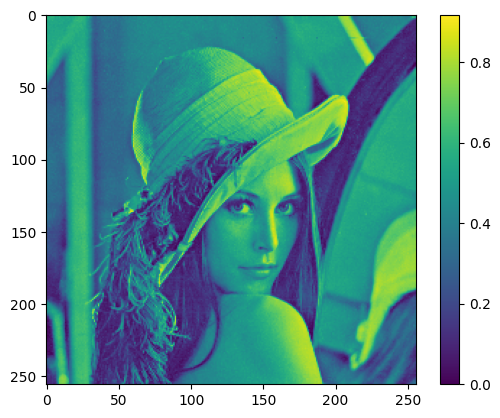

In [3]:
lena = plt.imread('data/lena.png')
plt.imshow(lena)
plt.colorbar()

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [4]:
def meanfilter(img, fsize):
    result = numpy.zeros(img.shape)
    n = (fsize - 1) // 2
    for p in numpy.ndindex(img.shape[0]-2*n,img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(fsize, fsize): #index macht automatisch bei z.B. 3: 0, 1, 2 in jede Richtung
            y = p[0] + q[0]
            x = p[1] + q[1]
            neighborhood_sum = neighborhood_sum + img[y,x]
        neighborhood_mean = neighborhood_sum / (fsize * fsize)
        result[p[0]+n, p[1]+n] = neighborhood_mean
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

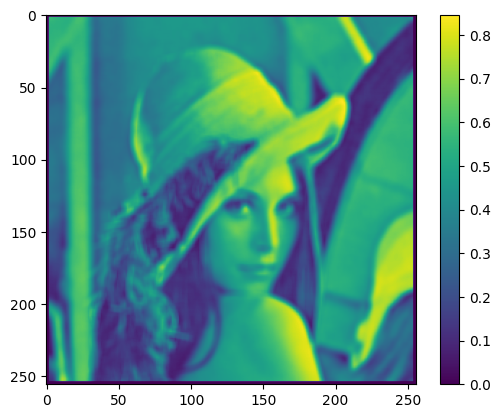

In [5]:
lena.copy()
meinefilterlena1 = meanfilter(lena,5)
plt.imshow(meanfilter(lena,5))
plt.colorbar()

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

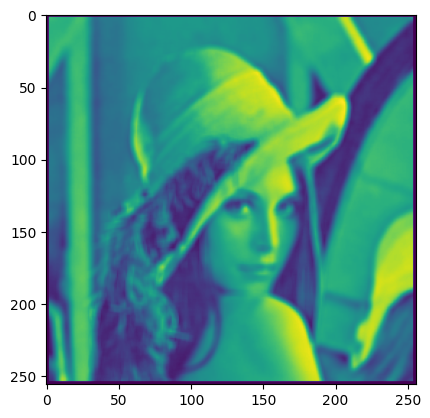

In [6]:
filterlena1richtig = plt.imread('data/lena_meanfilter5.png')
plt.imshow(filterlena1richtig)

In [7]:
assert numpy.allclose(meinefilterlena1, filterlena1richtig, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [8]:
def medianfilter(img, fsize):
    result = numpy.zeros(img.shape)
    n = (fsize - 1) // 2
    for p in numpy.ndindex(img.shape[0]-2*n,img.shape[1]-2*n):
        pixels = list()
        for q in numpy.ndindex(fsize, fsize):
            y = p[0] + q[0]
            x = p[1] + q[1]
            pixels.append(img[y,x])
        pixelssorted = numpy.sort(pixels)
        varint = pixelssorted[len(pixelssorted)//2]
        result[p[0]+n, p[1]+n] = varint
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

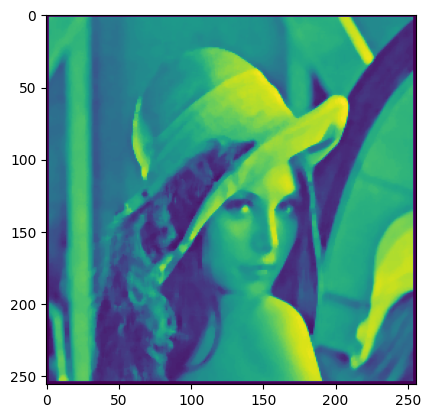

In [19]:
lena.copy()
meinefilterlena2 = medianfilter(lena,5)
plt.imshow(meinefilterlena2)

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

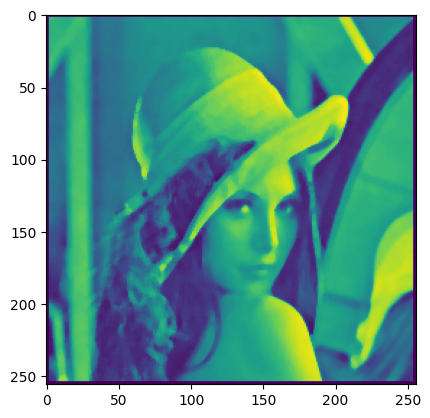

In [13]:
filterlena2richtig = plt.imread('data/lena_medianfilter5.png')
plt.imshow(filterlena2richtig)

In [15]:
assert numpy.allclose(meinefilterlena2, filterlena2richtig, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [16]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

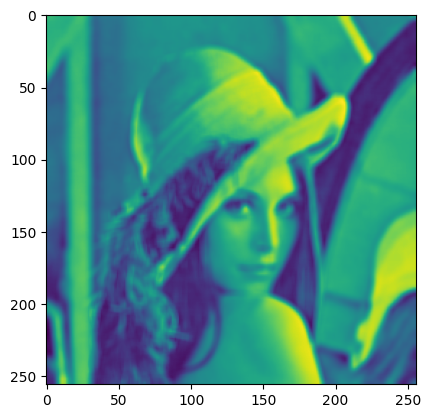

In [22]:
lena.copy()
plt.imshow(scipy.ndimage.uniform_filter(lena, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

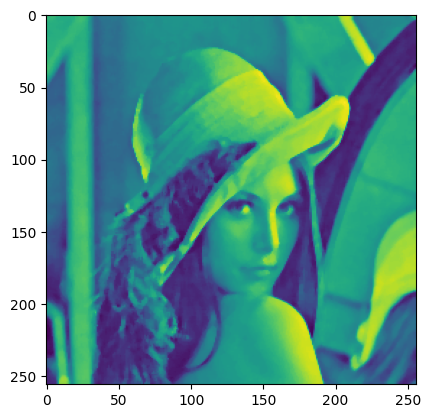

In [24]:
lena.copy()
plt.imshow(scipy.ndimage.median_filter(lena, 4))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

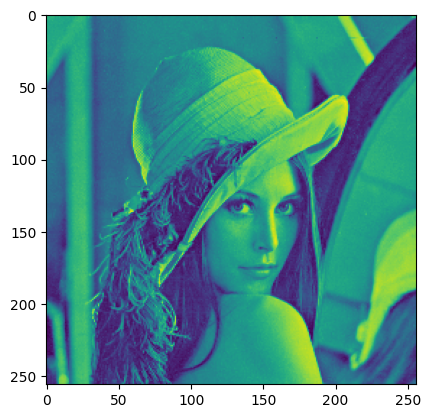

In [30]:
lena.copy()
plt.imshow(scipy.ndimage.gaussian_filter(lena, 0.3))

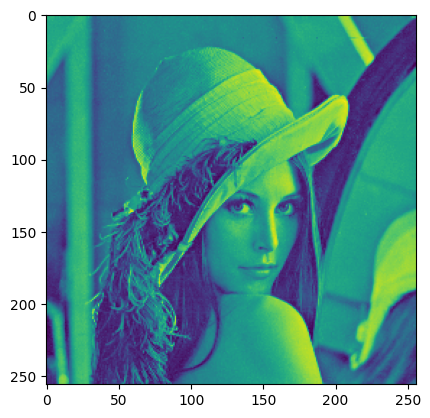

In [29]:
plt.imshow(lena)

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

kein Rand in `scipy.ndimage`

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [12]:
def fastfilter(img, fsize):
    result = numpy.zeros(img.shape)
    n = (fsize - 1) // 2
    for p in numpy.ndindex(img.shape[0]-2*n,img.shape[1]-2*n):
        neighborhood_sum = 0
        for q in numpy.ndindex(fsize, fsize):
            y = p[0] + q[0]
            x = p[1] + q[1]
            neighborhood_sum = neighborhood_sum + img[y,x]
        neighborhood_mean = neighborhood_sum / (fsize * fsize)
        result[p[0]+n, p[1]+n] = neighborhood_mean
    return result

SyntaxError: incomplete input (1741712700.py, line 2)

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: